In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
'''

step by step

1. import data, split in train, val. test set given separately. do a 80-20 split
2. preprocessing data (imputing null values with mean for continuous variables, for categorical impute with mode or use a separate placeholder for null values)
   use one hot encoding for nominal variables and label encoding for ordinal variables
3. feature selection (how?)
4. train on the data (hyperparameter tune) (can we use linear regression library?)
5. see performance on test. root mean square error.
6. where is test set?

'''

'\n\nstep by step\n\n1. import data, split in train, val. test set given separately. do a 80-20 split\n2. preprocessing data (imputing null values with mean for continuous variables, for categorical impute with mode or use a separate placeholder for null values)\n   use one hot encoding for nominal variables and label encoding for ordinal variables\n3. feature selection (how?)\n4. train on the data (hyperparameter tune) (can we use linear regression library?)\n5. see performance on test. root mean square error.\n6. where is test set?\n\n'

# Train Test Split

In [3]:
df = pd.read_csv("SP_Train.csv")

In [4]:
y = df['Item_Outlet_Sales']
X = df.drop(columns=["Item_Outlet_Sales"],axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.2, random_state=33)

#keeping an 80-20 split between training and validation set

In [5]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [6]:
'''from google.colab import files


uploaded = files.upload()'''

'from google.colab import files\n\n\nuploaded = files.upload()'

# Preprocessing

## Checking for missing values and checking which are continuous and which are discrete

In [7]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4577,FDJ09,15.00,Low Fat,0.058725,Snack Foods,43.6744,OUT017,2007,NaN,Tier 2,Supermarket Type1
2473,FDT25,7.50,Low Fat,0.050854,Canned,121.7072,OUT045,2002,NaN,Tier 2,Supermarket Type1
3321,NCB06,NaN,Low Fat,0.081933,Health and Hygiene,161.4920,OUT027,1985,Medium,Tier 3,Supermarket Type3
5277,FDD57,18.10,Low Fat,0.022395,Fruits and Vegetables,96.5094,OUT035,2004,Small,Tier 2,Supermarket Type1
4595,FDL58,5.78,Regular,0.074149,Snack Foods,262.2568,OUT046,1997,Small,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
2706,FDU34,18.25,Low Fat,0.075347,Snack Foods,126.3046,OUT045,2002,NaN,Tier 2,Supermarket Type1
578,FDL08,10.80,Low Fat,0.049678,Fruits and Vegetables,245.9144,OUT013,1987,High,Tier 3,Supermarket Type1
5848,FDE24,14.85,Low Fat,0.093652,Baking Goods,141.5812,OUT045,2002,NaN,Tier 2,Supermarket Type1
2439,FDC45,NaN,Low Fat,0.237651,Fruits and Vegetables,170.2106,OUT019,1985,Small,Tier 1,Grocery Store


In [8]:
X_train['Item_Weight'].isnull().sum() #impute with mean

1107

In [9]:
X_train['Item_Fat_Content'].isnull().sum()

0

In [10]:
X_train['Item_Fat_Content'].value_counts() #one hot encoding

,count
Item_Fat_Content,
Low Fat,3773
Regular,2211
LF,238
reg,93
low fat,83


In [11]:
# Standardize the values in 'Item_Fat_Content'
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace({
    'Low Fat': 'Low Fat',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
})

X_val['Item_Fat_Content'] = X_val['Item_Fat_Content'].replace({
    'Low Fat': 'Low Fat',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
})


In [12]:
X_train['Item_Visibility'].isnull().sum()

0

In [13]:
X_train['Item_Type'].isnull().sum()

0

In [14]:
X_train['Item_Type'].value_counts() #one hot encoding

,count
Item_Type,
Fruits and Vegetables,937
Snack Foods,902
Household,681
Frozen Foods,647
Dairy,515
Baking Goods,496
Canned,491
Health and Hygiene,371
Soft Drinks,328


In [15]:
X_train['Item_MRP'].isnull().sum()

0

In [16]:
X_train['Outlet_Identifier'].isnull().sum()

0

In [17]:
X_train['Outlet_Identifier'].value_counts() #one hot encoding

,count
Outlet_Identifier,
OUT013,713
OUT046,710
OUT035,708
OUT027,707
OUT049,694
OUT017,684
OUT045,680
OUT018,679
OUT010,423


In [18]:
X_train['Outlet_Establishment_Year'].isnull().sum()

0

In [19]:
X_train['Outlet_Establishment_Year'].value_counts() #one hot encoding

,count
Outlet_Establishment_Year,
1985,1107
1987,713
1997,710
2004,708
1999,694
2007,684
2002,680
2009,679
1998,423


In [20]:
X_train['Outlet_Size'].isnull().sum() #impute with mode

1787

In [21]:
X_train['Outlet_Size'].value_counts() #label encoding

,count
Outlet_Size,
Medium,2080
Small,1818
High,713


In [22]:
X_train['Outlet_Location_Type'].isnull().sum()

0

In [23]:
X_train['Outlet_Location_Type'].value_counts() #label encoding

,count
Outlet_Location_Type,
Tier 3,2522
Tier 2,2072
Tier 1,1804


In [24]:
X_train['Outlet_Type'].isnull().sum()

0

In [25]:
X_train['Outlet_Type'].value_counts() #one hot encoding

,count
Outlet_Type,
Supermarket Type1,4189
Grocery Store,823
Supermarket Type3,707
Supermarket Type2,679


## Imputing missing values

In [26]:
# item weight and outlet size has null values

In [27]:
X_train['Item_Weight'] = X_train['Item_Weight'].fillna(X_train['Item_Weight'].mean())
X_val['Item_Weight'] = X_val['Item_Weight'].fillna(X_train['Item_Weight'].mean())

In [28]:
X_val['Item_Weight'].isna().sum()

0

In [29]:
X_val.shape

(1600, 11)

In [30]:
X_train['Item_Weight'].describe()

,Item_Weight
count,6398.000000
mean,12.888089
std,4.219542
min,4.555000
25%,9.395000
50%,12.888089
75%,16.000000
max,21.350000


In [31]:
X_train['Outlet_Size'] = X_train['Outlet_Size'].fillna(X_train['Outlet_Size'].mode()[0])
X_val['Outlet_Size'] = X_val['Outlet_Size'].fillna(X_train['Outlet_Size'].mode()[0])

In [32]:
X_train['Outlet_Size'].isna().sum()

0

In [33]:
X_train['Item_Weight'].isna().sum()

0

## Encoding Categorical Variables

In [34]:
# one hot encoding for Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Type
# label encoding for Outlet_Size, Outlet_Location_Type

In [35]:
# List of features to one-hot encode
features_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']

# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=features_to_encode, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=features_to_encode, drop_first=True)




In [36]:
# Define a mapping for manual encoding
size_mapping = {'Small': 0, 'Medium': 1, 'High': 2}

# Apply the mapping to the 'Outlet_Size' column
X_train_encoded['Outlet_Size'] = X_train_encoded['Outlet_Size'].map(size_mapping)
X_val_encoded['Outlet_Size'] = X_val_encoded['Outlet_Size'].map(size_mapping)

In [37]:
# Define a mapping for manual encoding
location_mapping = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}

# Apply the mapping to the 'Outlet_Location_Type' column
X_train_encoded['Outlet_Location_Type'] = X_train_encoded['Outlet_Location_Type'].map(location_mapping)
X_val_encoded['Outlet_Location_Type'] = X_val_encoded['Outlet_Location_Type'].map(location_mapping)

# Display the transformed column
print(X_train_encoded['Outlet_Location_Type'].head())

4577    1
2473    1
3321    2
5277    1
4595    0
Name: Outlet_Location_Type, dtype: int64


In [38]:
# Define a mapping for ordinal encoding based on chronological order
year_mapping = {
    1985: 0,
    1987: 1,
    1997: 2,
    1998: 3,
    1999: 4,
    2002: 5,
    2004: 6,
    2007: 7,
    2009: 8
}

# Apply the mapping to the 'Outlet_Establishment_Year' column
X_train_encoded['Outlet_Establishment_Year'] = X_train_encoded['Outlet_Establishment_Year'].map(year_mapping)
X_val_encoded['Outlet_Establishment_Year'] = X_val_encoded['Outlet_Establishment_Year'].map(year_mapping)

# Display the transformed column
print(X_train_encoded['Outlet_Establishment_Year'].head())


4577    7
2473    5
3321    0
5277    6
4595    2
Name: Outlet_Establishment_Year, dtype: int64


In [39]:
X_train_encoded.drop(columns=['Item_Identifier'],inplace=True)
X_val_encoded.drop(columns=['Item_Identifier'],inplace=True)

## Scaling Numerical Features

In [40]:
# numerical features are Item_Weight, Item_Visibility, Item_MRP

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# List of numerical features to scale
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Fit and transform the scaler to the selected features
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])
X_val_encoded[numerical_features] = scaler.transform(X_val_encoded[numerical_features])

# Display the scaled dataset
print(X_train_encoded[numerical_features].head())

      Item_Weight  Item_Visibility  Item_MRP
4577     0.621911         0.178827  0.052566
2473     0.175350         0.154858  0.383777
3321     0.496165         0.249500  0.552644
5277     0.806490         0.068197  0.276824
4595     0.072938         0.225795  0.980341


## Removing outliers

In [42]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # 1st quartile
        Q3 = df[column].quantile(0.75)  # 3rd quartile
        IQR = Q3 - Q1                   # Interquartile range
        lower_bound = Q1 - 1.5 * IQR    # Lower bound
        upper_bound = Q3 + 1.5 * IQR    # Upper bound
        # Filter out rows outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example: Apply the function to your DataFrame
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']  # Replace with your numerical column names
X_train_encoded_cleaned = remove_outliers_iqr(X_train_encoded, numerical_columns)
y_train_cleaned = y_train[X_train_encoded_cleaned.index]

print("Original size:", X_train_encoded.shape)
print("Cleaned size:", X_train_encoded_cleaned.shape)

Original size: (6398, 34)
Cleaned size: (6299, 34)


# Feature Selection

In [43]:
X_train_encoded_cleaned.shape

(6398, 34)

Features with significant correlation to the target:
Item_Visibility                   -0.080534
Item_MRP                           0.577105
Outlet_Establishment_Year         -0.044881
Outlet_Size                        0.082502
Outlet_Location_Type               0.088926
Item_Fat_Content_Regular           0.025248
Item_Type_Frozen Foods            -0.013620
Item_Type_Fruits and Vegetables    0.031838
Item_Type_Health and Hygiene      -0.019694
Item_Type_Household                0.011322
Item_Type_Others                  -0.023746
Item_Type_Snack Foods              0.014952
Item_Type_Soft Drinks             -0.015867
Item_Type_Starchy Foods            0.022657
Outlet_Identifier_OUT013           0.023177
Outlet_Identifier_OUT017           0.030115
Outlet_Identifier_OUT018          -0.045635
Outlet_Identifier_OUT019          -0.263536
Outlet_Identifier_OUT027           0.311888
Outlet_Identifier_OUT035           0.042037
Outlet_Identifier_OUT046           0.012933
Outlet_Identifier_OUT04

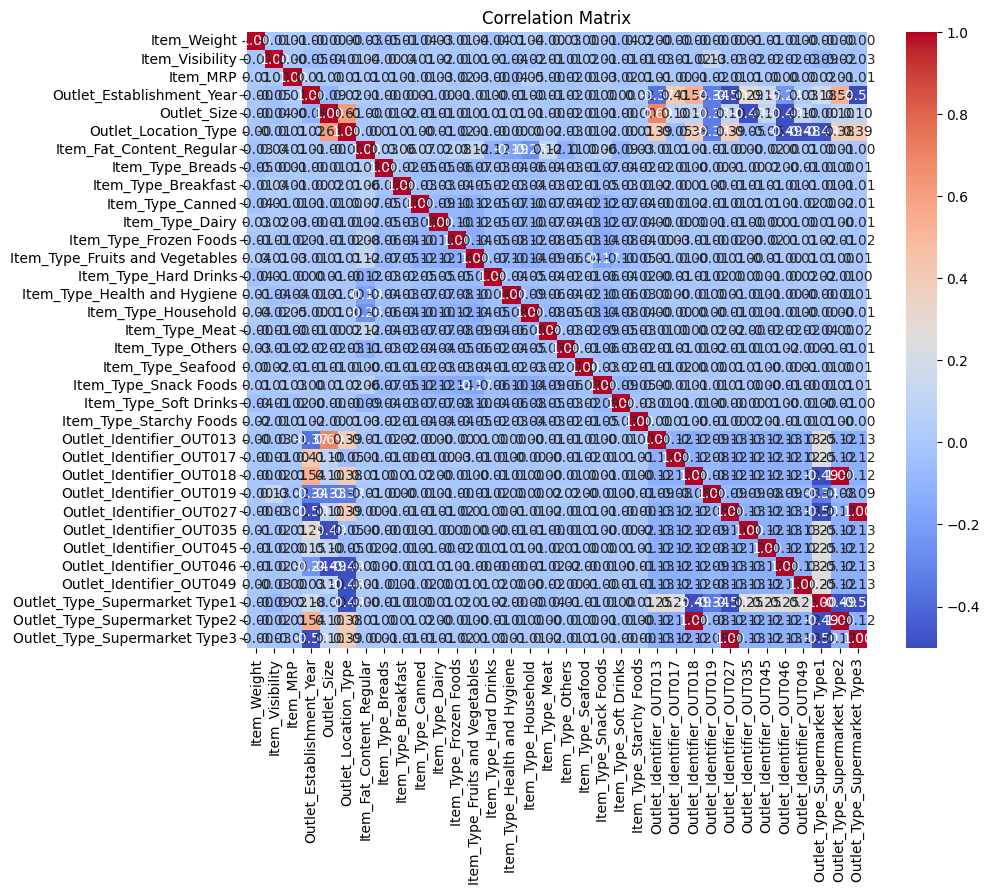

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# data = pd.read_csv('train.csv')

# Compute the correlation matrix for numerical features
correlation_matrix = X_train_encoded_cleaned.corr()

# Set a threshold for high correlation
threshold = 0.7

# Find features with high correlation (pairs with correlation > threshold)
highly_corr_pairs = correlation_matrix[abs(correlation_matrix) > threshold].stack()

# Remove self-correlation pairs
highly_corr_pairs = highly_corr_pairs[highly_corr_pairs.index.get_level_values(0) != highly_corr_pairs.index.get_level_values(1)]

# Compute correlation with the target variable `y`
target_corr = X_train_encoded_cleaned.corrwith(y)

# Select features with significant correlation to the target (threshold > 0.1)
selected_features = target_corr[abs(target_corr) > 0.01]
print("Features with significant correlation to the target:")
print(selected_features)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#selected_features = selected_features.index.tolist()
X_final = X_train_encoded_cleaned[selected_features]
model = LinearRegression()
model.fit(X_final, y_train_cleaned)

y_pred = model.predict(X_val_encoded[selected_features])

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1126.8379321071998


# Bagging and Boosting




In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_encoded_cleaned[selected_features], y_train_cleaned)

y_pred = gb_model.predict(X_val_encoded[selected_features])
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Gradient Boosting RMSE: {rmse}")


Gradient Boosting RMSE: 1075.4049310511127


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded_cleaned[selected_features], y_train_cleaned)

# Make predictions
y_pred = model.predict(X_val_encoded[selected_features])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1133.3391206874155


## Hyperparameter Tuning for Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)
grid_search.fit(X_train_encoded_cleaned[selected_features], y_train_cleaned)

# Best parameters from Grid Search
print("Best parameters from Grid Search:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val_encoded[selected_features])
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Tuned Gradient Boosting RMSE (Grid Search): {rmse}")


# Alternatively, use Randomized Search for larger parameter spaces
param_distributions = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 6),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of combinations to try
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_encoded_cleaned[selected_features], y_train_cleaned)

# Best parameters from Randomized Search
print("Best parameters from Randomized Search:", random_search.best_params_)

# Evaluate the best model
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_val_encoded[selected_features])
rmse_random = np.sqrt(mean_squared_error(y_val, y_pred_random))
print(f"Tuned Gradient Boosting RMSE (Randomized Search): {rmse_random}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
